# Jupyter Notebook of water properties

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams["font.family"] = 'Arial'
mpl.rcParams["mathtext.fontset"] = 'cm'
import meshio
import matplotlib.tri as mtri
import h5py
from matplotlib.ticker import MultipleLocator
import linecache
from matplotlib import ticker
from matplotlib.ticker import LogLocator
from matplotlib import cm
import os
import copy
# read vtk 
import numpy
from vtk import vtkRectilinearGridReader
from vtk.util import numpy_support as VN
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import iapws
IAPWS97_TCRIT = 647.096  #/* K */
IAPWS97_PCRIT = 22.064e6 #/* Pa */
IAPWS97_RHOCRIT = 322. #/* kg/m³ */
IAPWS97_TTRIP = 623.15
path_figures='../../../../../_figures'

## How to use [iapws](https://iapws.readthedocs.io/en/latest/#) calculate water properties

In [2]:
T0,P0=400, 35 # deg.C, MPa
steam=iapws.IAPWS97(T=T0+273.15, P=P0) # note that the unit of input T is K
print('Density: %f, specific heat: %f, viscosity: %f, specific enthalpy: %f'%(steam.rho, steam.cp,steam.mu, steam.h))

Density: 474.919081, specific heat: 11.650514, viscosity: 0.000056, specific enthalpy: 1988.429998


## Properties as function of temperature

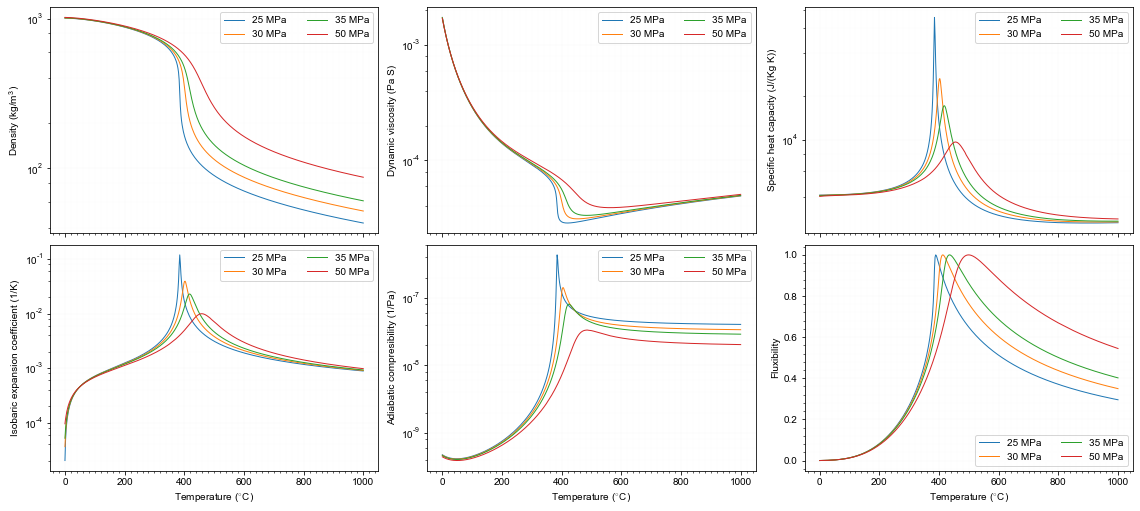

In [3]:
T=np.linspace(0, 1000, 500) # deg.C
P=np.array([25, 30, 35, 50]) # MPa
def calProp(T, P0):
    rho=np.zeros_like(T)
    mu=np.zeros_like(T)
    cp=np.zeros_like(T)
    h=np.zeros_like(T)
    alpha=np.zeros_like(T)
    beta=np.zeros_like(T)
    F=np.zeros_like(T) #Fluxibility
    for i in range(0,len(T)):
        steam=iapws.IAPWS97(P=P0, T=T[i]+273.15)
        rho[i]=steam.rho
        mu[i]=steam.mu
        cp[i]=steam.cp*1000
        h[i]=steam.h*1000
        alpha[i]=steam.alfav
        beta[i]=steam.kappas * 1E-6
        F[i]=(1100 - rho[i])*rho[i]*h[i]/mu[i]
    return rho, cp, mu, h, alpha, beta, F
def plotProp_P0(P0,**kwargs):
    rho, cp, mu, h, alpha, beta, F=calProp(T,P0)
    # rho
    axs[0][0].semilogy(T,rho,label='%.0f MPa'%P0,**kwargs)
    axs[0][0].set_ylabel('Density (kg/m$^{\mathregular{3}}$)')
    # mu
    axs[0][1].semilogy(T,mu,label='%.0f MPa'%P0,**kwargs)
    axs[0][1].set_ylabel('Dynamic viscosity (Pa S)')
    # cp
    axs[0][2].semilogy(T,cp,label='%.0f MPa'%P0,**kwargs)
    axs[0][2].set_ylabel('Specific heat capacity (J/(Kg K))')
    # alpha
    axs[1][0].semilogy(T,alpha,label='%.0f MPa'%P0,**kwargs)
    axs[1][0].set_ylabel('Isobaric expansion coefficient (1/K)')
    # beta
    axs[1][1].semilogy(T,beta,label='%.0f MPa'%P0,**kwargs)
    axs[1][1].set_ylabel('Adiabatic compresibility (1/Pa)')
    # fluxibility
    axs[1][2].plot(T,(F-F.min())/(F.max()-F.min()),label='%.0f MPa'%P0,**kwargs)
    axs[1][2].set_ylabel('Fluxibility')
# plot
fig,axs=plt.subplots(2,3,sharex=True,sharey=False,
                     gridspec_kw={"width_ratios":[1,1,1],"height_ratios":[1,1],'hspace':0.05,'wspace':0.15},
                         figsize=(16,7))
for P0 in P:
    plotProp_P0(P0, lw=1)

# set axis
for i in range(0,2):
    for j in range(0,3):
        axs[i][j].legend(ncol=2)
        ax=axs[i][j]
        ax.xaxis.set_major_locator(MultipleLocator(200))
        ax.xaxis.set_minor_locator(MultipleLocator(20))
        if((i==1) & (j==2)):
            ax.yaxis.set_major_locator(MultipleLocator(0.2))
            ax.yaxis.set_minor_locator(MultipleLocator(0.04))
        else:
            ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0, subs=(1.0,),numticks=20))
            ax.yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10.0, subs=(0.2,0.4,0.6,0.8),numticks=20))
        ax.grid(which='major',color='gray',lw=0.03)
        ax.grid(which='minor',color='lightgray',lw=0.03)
        
        axs[1][j].set_xlabel('Temperature ($^{\circ}$C)')
        
plt.subplots_adjust(left=0.04,right=0.98,bottom=0.07,top=0.99)
plt.savefig(path_figures+'/Properties_Water.pdf')
plt.savefig(path_figures+'/Properties_Water.svg')

plt.show()